# Sales Data Analysis

##### Imorting Necessary liberaries

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [38]:
df = pd.read_csv('/Users/sam/Desktop/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

##### Task #1: Merging 12 months of sales data into a single file

In [39]:
files = [file for file in os.listdir('./Sales_Data')]

all_months = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file, encoding_errors='ignore')
    all_months = pd.concat([all_months, df])

all_months.to_csv("all_data.csv", index=False)

##### Read in updated dataframe

In [40]:
all_data = pd.read_csv('all_data.csv')

### Cleaning the data

##### Drop rows with NAN

In [41]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

all_data = all_data.dropna(how='all')

all_data.drop(columns='Unnamed: 0', inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

##### Find Or and delete it

In [42]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Augment data with additional columns

##### Task #2: Add Month Column

In [44]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = pd.to_numeric(all_data['Month'])

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/4056633411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[0:2]
/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/4056633411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = pd.to_numeric(all_data['Month'])


In [45]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/140318151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/140318151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


##### Add a sales column

In [46]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/84092615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']


##### Add A city Column

In [47]:
def get_city(x):
    return x.split(',')[1]

def get_state(x):
    return x.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/104474145.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA)
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City (NY)
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA)
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA)


##### Question 1: What was the best months for sales? How much was earned in that month

In [48]:
results = all_data.groupby('Month').sum()

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/675579350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


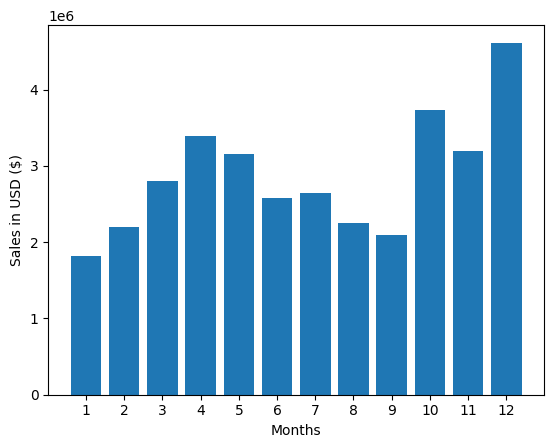

In [49]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.show()

##### Question 2: What city had the highest number of sales

In [50]:
results = all_data.groupby('City').sum()

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/1728101388.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


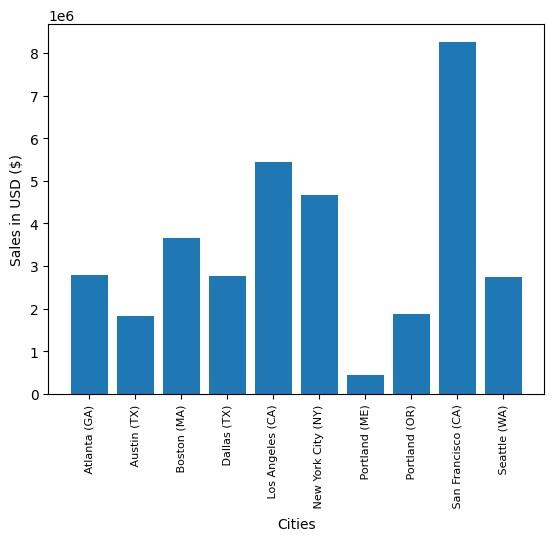

In [51]:
city = [city for city, df in all_data.groupby('City')]

plt.bar(city, results['Sales'])
plt.xticks(city, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()

##### Question 3: What time to display advertiesments to maximize the likelyhood of customer's buying?

In [52]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/3842191188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [53]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1
all_data.head()

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/3422240446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour
/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/3422240446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minutes'] = all_data['Order Date'].dt.minute
/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/3422240446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38,1


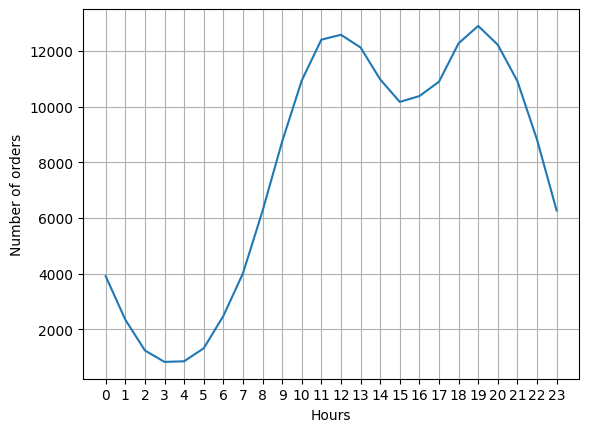

In [54]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count()['Count'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

In [55]:
# Going by the chart, right before 11 am and 7 pm are the good times to put the advertisement

##### Question 4: What products are sold most together

In [56]:
OT = all_data[all_data['Order ID'].duplicated(keep=False)]
OT['Grouped'] = OT.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/1620039443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OT['Grouped'] = OT.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [57]:
OT[['Order ID', 'Grouped']].drop_duplicates()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [58]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in OT['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) 
    # checks the combination of 2 in 'Grouped' and updates the counter
    
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


In [59]:
# The items sold the most together are mobile phones and charging cables

##### Question 5: What product sold the most? And why do you think it sold the most?

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/1427328743.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


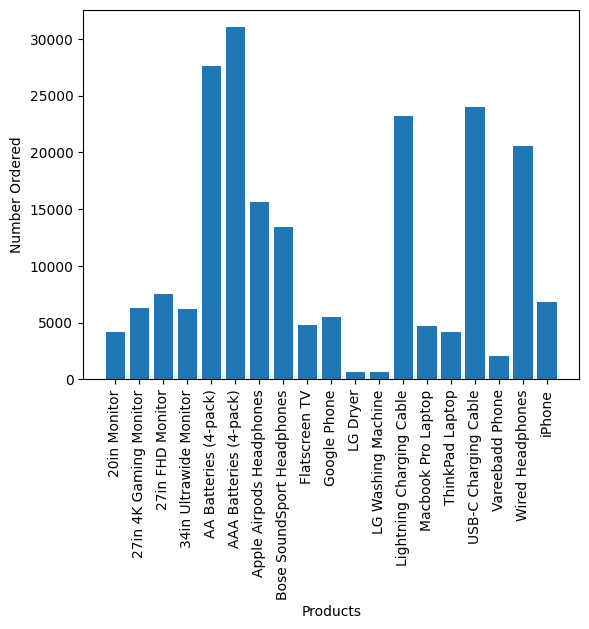

In [60]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

product = [product for product, df in product_group]

plt.bar(product, quantity_ordered)
plt.xticks(product,rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Number Ordered')
plt.show()

In [61]:
# from the graph we can see Batteries, Charging cables, and Wired Headphones sell the most

In [62]:
prices = product_group.mean()['Price Each']

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/1940768312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = product_group.mean()['Price Each']


In [63]:
# Overlay the prices to see the relation in prices and sales numbers

/var/folders/dx/g1l849rx2n98pjl_b2v6n1380000gn/T/ipykernel_50403/366791761.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical', size=8)


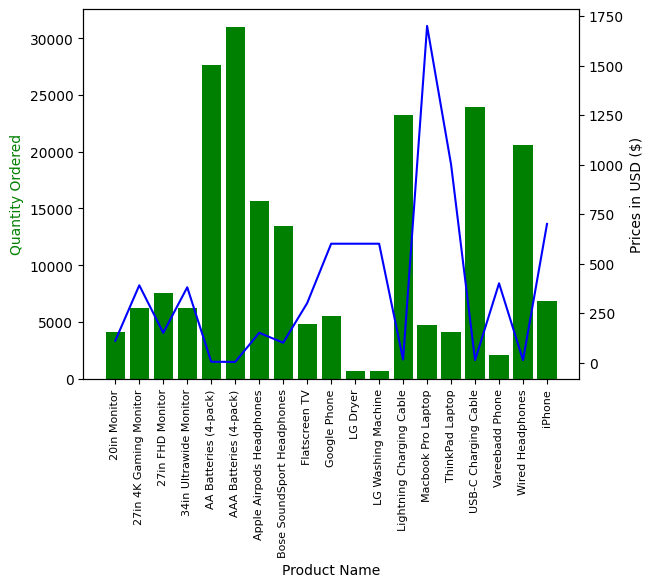

In [64]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered, color='g')
ax2.plot(product, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices in USD ($)')
ax1.set_xticklabels(product, rotation='vertical', size=8)

plt.show()

In [65]:
# from the overlayed graph of quantity ordered, and prices
# The price of batteries, charegers, and wired headphones is lower than other counterparts
# Thus explaning the huge quantity orders